# Evaluate power of sentiment to predict next years S&P price movement
The sentiment model is used to predict price movements from 2000-2019.
The sentiment model is compared with other baseline models using accuracy, confusion matrix, the gradient metric and backtrading.

In [109]:
import pandas as pd

df = pd.read_csv('data_new/allyrs_sentiment.csv',usecols=['date','senti'])

print(df.head())

         date   senti
0  1998/01/07 -0.2732
1  1998/01/07  0.3612
2  1998/02/12  0.0000
3  1998/02/18  0.0000
4  1998/02/18  0.0000


In [110]:
print(df.tail())

              date   senti
520204  2019/12/31  0.0000
520205  2019/12/31  0.5859
520206  2019/12/31  0.0000
520207  2019/12/31  0.0000
520208  2019/12/31 -0.1779


In [111]:
print('\nshape',df.shape)

print(df.isnull().sum().sum())


shape (520209, 2)
0


In [112]:
df['year'] = df['date'].apply(lambda x : x[0:4])

df.head()

,date,senti,year
0,1998/01/07,-0.2732,1998
1,1998/01/07,0.3612,1998
2,1998/02/12,0.0000,1998
3,1998/02/18,0.0000,1998
4,1998/02/18,0.0000,1998


## Calculate annual mean sentiment

In [113]:
mean_senti = df.groupby('year')['senti'].mean().to_frame()

mean_senti.head(5)

,senti
year,
1998,0.012811
1999,0.035368
2000,0.037569
2001,0.006857
2002,-0.003868


In [114]:
mean_senti.reset_index(level=0,inplace=True)

mean_senti.head(5)

,year,senti
0,1998,0.012811
1,1999,0.035368
2,2000,0.037569
3,2001,0.006857
4,2002,-0.003868


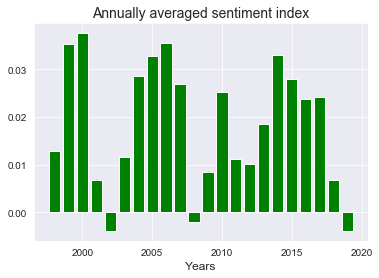

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

styr=1998
edyr=2019

fig,ax = plt.subplots(1,1)
ax.bar(np.arange(styr,edyr+1),mean_senti['senti'],color='g')
plt.grid(True) #; ax.zorder(0)
ax.set_axisbelow(True)
plt.title('Annually averaged sentiment index',fontsize=14)
plt.xlabel('Years',fontsize=12)
#plt.savefig('figs/annual_WSJ_sentiment.png', bbox_inches = 'tight')

plt.show()

## Read in S&P 500 price and calculate annual average of closing price

In [116]:
#https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC&.tsrc=fin-srch
#^GSPC
sp500 = pd.read_csv('data/sp500_1998-2020.csv')

print('\n\tsp500 = ',sp500.shape)

#Drop the year 2020 since we do not have data for the whole year.
sp500 = sp500[~sp500['Date'].str.contains('2020')]
print('\n\tsp500 = ',sp500.shape)


	sp500 =  (5716, 7)

	sp500 =  (5535, 7)


In [151]:
sp500.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,year
5530,2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000,2019
5531,2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000,2019
5532,2019-12-27,3247.229980,3247.929932,3234.370117,3240.020020,3240.020020,2428670000,2019
5533,2019-12-30,3240.090088,3240.919922,3216.570068,3221.290039,3221.290039,3013290000,2019
5534,2019-12-31,3215.179932,3231.719971,3212.030029,3230.780029,3230.780029,2893810000,2019


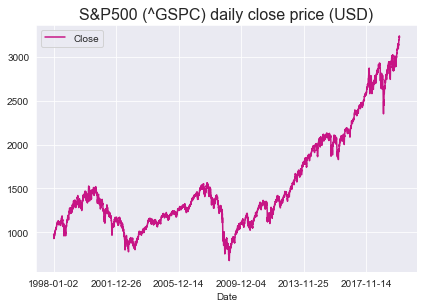

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.set_style("darkgrid")

ax2 = plt.subplot(222)
sns.set_style("darkgrid")
#sp500.iloc[0:].plot(x='Date',y='Close',ax=ax2,color='mediumvioletred')
sp500.plot(x='Date',y='Close',ax=ax2,color='mediumvioletred')
#sp500.plot(x='Date',y='Open',ax=ax2,color='brown')
plt.title('S&P500 (^GSPC) daily close price (USD)',fontsize=16)
#plt.savefig('figs/SP500_daily_close.png', bbox_inches = 'tight')

plt.show()

In [153]:
#Extract the year from the Date and put it in another column
sp500['year'] = sp500['Date'].apply(lambda x : x[0:4])

sp500.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,year
0,1998-01-02,970.429993,975.039978,965.729980,975.039978,975.039978,366730000,1998
1,1998-01-05,975.039978,982.630005,969.000000,977.070007,977.070007,628070000,1998
2,1998-01-06,977.070007,977.070007,962.679993,966.580017,966.580017,618360000,1998
3,1998-01-07,966.580017,966.580017,952.669983,964.000000,964.000000,667390000,1998
4,1998-01-08,964.000000,964.000000,955.039978,956.049988,956.049988,652140000,1998


In [154]:
#Calculate the annual mean of S&P closing price.
amean_sp500 = sp500.groupby('year')['Close'].mean().to_frame()

print(amean_sp500.shape)
print(mean_senti.shape)

(22, 1)
(22, 2)


In [155]:
amean_sp500.head(5)

,Close
year,
1998,1085.503253
1999,1327.329567
2000,1427.221069
2001,1194.178994
2002,993.934804


In [156]:
amean_sp500.reset_index(level=0,inplace=True)

amean_sp500.head(5)

,year,Close
0,1998,1085.503253
1,1999,1327.329567
2,2000,1427.221069
3,2001,1194.178994
4,2002,993.934804



styr, edyr =  1998 2019


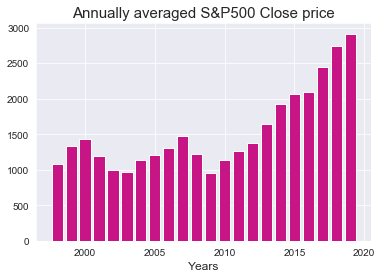

In [157]:
print('\nstyr, edyr = ',styr,edyr)

fig,ax = plt.subplots(1,1)
ax.bar(np.arange(styr,edyr+1),amean_sp500['Close'],color='mediumvioletred')
plt.grid(True) #; ax.zorder(0)
ax.set_axisbelow(True)
plt.title('Annually averaged S&P500 Close price',fontsize=15)
plt.xlabel('Years',fontsize=12)
#plt.savefig('figs/annual_average_sp500.png', bbox_inches = 'tight')

plt.show()

In [158]:
mean_senti.head(5)

,year,senti
0,1998,0.012811
1,1999,0.035368
2,2000,0.037569
3,2001,0.006857
4,2002,-0.003868


### Calculate consecutive differences in sp500 price to quantify price movement.
The first entry for the difference is for 1998. This is not defined since 1997 is not in the database.

The second entry quantifies the price movement between 1998 and 1999 (price(1999) - price(1998)).

The last entry is for 2019.  This quantifies the price movement between 2018 and 2019 (price(2019) - price(2018)).

In [159]:
dfmove = pd.DataFrame(amean_sp500['Close'].diff())

dfmove.rename(columns={"Close":"move"},inplace=True)

print('\n',dfmove.shape)

#The first entry is Nan since difference is not defined. It is not dropped from the dataframe since
#the index 0 is never used in subsequent calculations. Also when the dataframe is printed out it reminds us
#that the movement for 1998 is not defined.
#dfmove.dropna(inplace=True)

dfmove.head()


 (22, 1)


,move
0,NaN
1,241.826314
2,99.891502
3,-233.042074
4,-200.244190


In [160]:
#Put the movement and the year and close price in the same dataframe
dfmove = pd.concat([amean_sp500, dfmove],axis=1)

print('\n',dfmove.shape)

dfmove.head()


 (22, 3)


,year,Close,move
0,1998,1085.503253,NaN
1,1999,1327.329567,241.826314
2,2000,1427.221069,99.891502
3,2001,1194.178994,-233.042074
4,2002,993.934804,-200.244190


## Combine the sentiment and movement dataframes so that all the data required is in a single dataframe

In [161]:
dfall = pd.concat([mean_senti, dfmove[['move','Close']]],axis=1)

dfall.head()

,year,senti,move,Close
0,1998,0.012811,NaN,1085.503253
1,1999,0.035368,241.826314,1327.329567
2,2000,0.037569,99.891502,1427.221069
3,2001,0.006857,-233.042074,1194.178994
4,2002,-0.003868,-200.244190,993.934804



styr, edyr =  1998 2019 


nyrs =  22 

		year 	 senti 	 move 	close
	0     1998     128.1       nan   1085.5
	1     1999     353.7     241.8   1327.3
	2     2000     375.7      99.9   1427.2
	3     2001      68.6    -233.0   1194.2
	4     2002     -38.7    -200.2    993.9
	5     2003     115.8     -28.7    965.2
	6     2004     286.2     165.4   1130.6
	7     2005     327.8      76.6   1207.2
	8     2006     355.6     103.2   1310.5
	9     2007     269.6     166.7   1477.2
	10    2008     -20.5    -257.1   1220.0
	11    2009      84.0    -272.0    948.0
	12    2010     252.0     191.9   1140.0
	13    2011     112.8     127.7   1267.6
	14    2012     101.2     111.7   1379.4
	15    2013     185.3     264.4   1643.8
	16    2014     329.9     287.6   1931.4
	17    2015     279.3     129.7   2061.1
	18    2016     238.0      33.6   2094.7
	19    2017     242.3     354.4   2449.1
	20    2018      67.4     297.1   2746.2
	21    2019     -38.7     167.1   2913.4


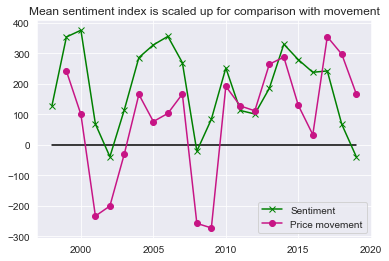

In [163]:
nyrs = dfall.shape[0]

styr = np.int(dfall.loc[0,'year'])
edyr = np.int(dfall.loc[nyrs-1,'year'])

print('\nstyr, edyr = ',styr, edyr,'\n')

print('\nnyrs = ',nyrs,'\n')

print('\t\tyear \t senti \t move \tclose')

for i in np.arange(0,22):
 print('\t{0:<5d} {1:5s} {2:8.1f}  {3:8.1f} {4:8.1f}'.format(i,dfall.loc[i,'year'],dfall.loc[i,'senti']*10000,\
                                                     dfall.loc[i,'move'],dfall.loc[i,'Close'])) 

hd=[]
plt.figure(1)
plt.plot(np.arange(styr,edyr+1),np.full(edyr-styr+1,0),'k-')
h1,=plt.plot(np.arange(styr,edyr+1),dfall['senti']*10000,'g-x'); hd.append(h1) #Scale up for comparison (only sign matters).
h1,=plt.plot(np.arange(styr,edyr+1),dfall['move'],'-o',color='mediumvioletred'); hd.append(h1)
plt.title('Mean sentiment index is scaled up for comparison with movement')
plt.legend(hd,['Sentiment','Price movement'])
#plt.savefig('figs/sentiment_price.png', bbox_inches = 'tight')

plt.show()

## Predict the movement for next year
The first prediction is for the year 2000 and the last prediction is for 2019.

Sentiment model : The prediction for any year is based on the sentiment index in the preceding year. If the sentiment index is negative (positive) in the current year the prediction for movement next year is downwards (upwards).

Persistence model : The prediction for any year based on the movement in the preceding year. If the movemement is negative (positive) in the current year the prediction for movement next year is downwards (upwards).

true_move is the actual movement used for verification of the predictions. The first element in true_move is the sign of the movement for the year 2000. The last element is the sign of movement for year 2019. The first prediction for the sentiment (persistence) model is its sentiment index (movement) for the year 1999. 'UP' means upward and 'DW' means downwards.

In [164]:
from collections import Counter

print('\nfirst, last year = ',dfall.loc[0,'year'], dfall.loc[nyrs-1,'year'],'\n')

true_move  = ['UP' if x>=0  else 'DW' for x in dfall.loc[2:nyrs-1,'move']]  #index 2 points to year 2000
pred_senti = ['UP' if x>=0  else 'DW' for x in dfall.loc[1:nyrs-2,'senti']] #nyrs-2 points to 2018
pred_persi = ['UP' if x>=0  else 'DW' for x in dfall.loc[1:nyrs-2,'move']]

npreds = len(true_move)

print('len(pred_senti) = ',len(pred_senti))
print('len(pred_persi) = ',len(pred_persi))
print('npreds  = ',npreds)

print('')

count_move = Counter(true_move)
for key,value in count_move.items():
 print('# of {0:3s} movements are {1:5d}'.format(key,value))

print('\n\t     year \t senti \t move \t Close \ttrue_move pred_persi pred_senti ')

for i in np.arange(nyrs):
 if i==0 or i==nyrs-1:
  print('\t{0:<5d} {1:5s} {2:8.1f}  {3:8.1f} {4:8.1f}'.format(i,dfall.loc[i,'year'],dfall.loc[i,'senti']*10000,\
                                                    dfall.loc[i,'move'],dfall.loc[i,'Close']))     
 else:   
  print('\t{0:<5d} {1:5s} {2:8.1f}  {3:8.1f} {4:8.1f} {5:>5s} {6:>5s} {7:>5s}'.format(i,dfall.loc[i,'year'],\
                                    dfall.loc[i,'senti']*10000, dfall.loc[i,'move'],dfall.loc[i,'Close'], \
                                    true_move[i-1],pred_persi[i-1],pred_senti[i-1])) 


first, last year =  1998 2019 

len(pred_senti) =  20
len(pred_persi) =  20
npreds  =  20

# of UP  movements are    15
# of DW  movements are     5

	     year 	 senti 	 move 	 Close 	true_move pred_persi pred_senti 
	0     1998     128.1       nan   1085.5
	1     1999     353.7     241.8   1327.3    UP    UP    UP
	2     2000     375.7      99.9   1427.2    DW    UP    UP
	3     2001      68.6    -233.0   1194.2    DW    DW    UP
	4     2002     -38.7    -200.2    993.9    DW    DW    DW
	5     2003     115.8     -28.7    965.2    UP    DW    UP
	6     2004     286.2     165.4   1130.6    UP    UP    UP
	7     2005     327.8      76.6   1207.2    UP    UP    UP
	8     2006     355.6     103.2   1310.5    UP    UP    UP
	9     2007     269.6     166.7   1477.2    DW    UP    UP
	10    2008     -20.5    -257.1   1220.0    DW    DW    DW
	11    2009      84.0    -272.0    948.0    UP    DW    UP
	12    2010     252.0     191.9   1140.0    UP    UP    UP
	13    2011     112.8     127.7 

In [165]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print('len(true_move) = ',npreds)

print('\nsenti : accuracy = {0:4.2f}'.format(accuracy_score(true_move, pred_senti)))
print('\npersi : accuracy = {0:4.2f}'.format(accuracy_score(true_move, pred_persi)))

#print('\nClassification_report')
#print('\n',classification_report(true_move, pred_senti))

len(true_move) =  20

senti : accuracy = 0.85

persi : accuracy = 0.80


In [166]:
confusion_matrix(true_move, pred_senti,labels=['UP','DW'])

array([[15,  0],
       [ 3,  2]], dtype=int64)

In [167]:
confusion_matrix(true_move, pred_persi,labels=['UP','DW'])

array([[13,  2],
       [ 2,  3]], dtype=int64)

## Set up four more models : perfect model, bad model, always UP prediction model and always DOWN prediction model.

In [168]:
perfect_move = true_move.copy()   # all predictions correct.

bad_move= ['UP' if x=='DW' else 'DW' for x in true_move]  # all predictions wrong.

pred_UP = ['UP' for i in np.arange(npreds)]  # all predictions upwards

pred_DW = ['DW' for i in np.arange(npreds)]  #all predictions downwards


len(move_magn) =  20
move_magn[0] =  99.89150176190515
move_magn[npreds-1] =  167.14219708601922

gradient metric : senti =  2187.43
gradient metric : persi =  1873.24
gradient metric : perfect =  3568.29
gradient metric : imperfect = -3568.29
gradient metric : UP =  1586.03
gradient metric : DOWN = -1586.03

sentiment model (MISSES)
2001   WRONG  -233.04
2002   WRONG  -200.24
2008   WRONG  -257.14

persistence model (MISSES)
2001   WRONG  -233.04
2004   WRONG  165.42
2008   WRONG  -257.14
2010   WRONG  191.92


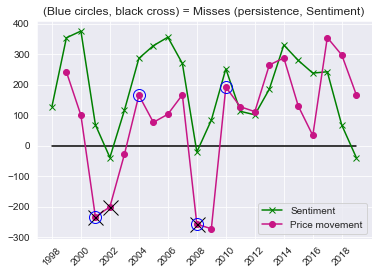

In [169]:
import backtrade
import importlib
from numpy import ma
importlib.reload(backtrade)

move_magn = np.asarray(dfall.loc[2:npreds+1,'move'])  #True movements

print('\nlen(move_magn) = ',len(move_magn))
print('move_magn[0] = ',move_magn[0])
print('move_magn[npreds-1] = ',move_magn[npreds-1])

hitmiss_senti,sum_magn = backtrade.magnitude_move(pred_senti,true_move,move_magn)
print('\ngradient metric : senti = {0:8.2f}'.format(sum_magn))    
hitmiss_persi,sum_magn = backtrade.magnitude_move(pred_persi,true_move,move_magn)
print('gradient metric : persi = {0:8.2f}'.format(sum_magn))
hitmiss,sum_magn = backtrade.magnitude_move(perfect_move,true_move,move_magn)
print('gradient metric : perfect = {0:8.2f}'.format(sum_magn))    
hitmiss,sum_magn = backtrade.magnitude_move(bad_move,true_move,move_magn)
print('gradient metric : imperfect = {0:8.2f}'.format(sum_magn))    
hitmiss, sum_magn = backtrade.magnitude_move(pred_UP,true_move,move_magn)
print('gradient metric : UP = {0:8.2f}'.format(sum_magn))    
hitmiss, sum_magn = backtrade.magnitude_move(pred_DW,true_move,move_magn)
print('gradient metric : DOWN = {0:8.2f}'.format(sum_magn))   

# yrarr = dfall.loc[2:npreds+1,'year'].tolist()
print('\nsentiment model (MISSES)')

hd=[]
plt.figure(1)
plt.plot(np.arange(styr,edyr+1),np.full(edyr-styr+1,0),'k-')
h1,=plt.plot(np.arange(styr,edyr+1),dfall['senti']*10000,'g-x'); hd.append(h1) #Scale up for comparison (only sign matters).
h1,=plt.plot(np.arange(styr,edyr+1),dfall['move'],'-o',color='mediumvioletred'); hd.append(h1)
for i in range(npreds): 
 if hitmiss_senti[i]=='WRONG':
  plt.plot(styr+i+2,dfall.loc[i+2,'move'],'kx',markersize=15)
  print('{0:6s} {1:6s} {2:<6.2f}'.format(yrarr[i],hitmiss_senti[i],dfall.loc[i+2,'move']))

print('\npersistence model (MISSES)')

for i in range(npreds): 
 if hitmiss_persi[i]=='WRONG':
  plt.plot(styr+i+2,dfall.loc[i+2,'move'],'o',markersize=12,fillstyle='none',color='b')
  print('{0:6s} {1:6s} {2:>6.2f}'.format(yrarr[i],hitmiss_persi[1],dfall.loc[i+2,'move'])    )
 plt.xticks(np.arange(styr,edyr+1,2),np.arange(styr,edyr+1,2),rotation=45)
 plt.title('(Blue circles, black cross) = Misses (persistence, Sentiment)')
 plt.legend(hd,['Sentiment','Price movement'])
# plt.savefig('figs/annual_hit_miss.png', bbox_inches = 'tight')

plt.show()

## Backtrading

In [170]:
import backtrade
import importlib
importlib.reload(backtrade)

closeprice = np.asarray(dfall.loc[1:npreds+1,'Close'])

print('\ncloseprice[0]      = ',closeprice[0])
print('closeprice[npreds] = ',closeprice[npreds])
print('len(closeprice) = ',len(closeprice))

print('\npersistence model')
invest,stock,cash = backtrade.trade(pred_persi,closeprice)
cash_end = cash[npreds-1]+stock[npreds-1]*closeprice[npreds]
print('\tCash at end of {0:2d} years = {1:6.1f} '.format(npreds+1,cash_end))
print('\tNet profit = {0:6.1f}'.format(cash_end - invest))
print('\t%profit = {0:6.1f}'.format(100.0*(cash_end - invest)/invest))

print('\nsentiment model')
invest,stock,cash = backtrade.trade(pred_senti,closeprice)
cash_end = cash[npreds-1]+stock[npreds-1]*closeprice[npreds]
print('\tCash at end of {0:2d} years = {1:6.1f} '.format(npreds+1,cash_end))
print('\tNet profit = {0:6.1f}'.format(cash_end - invest))
print('\t%profit = {0:6.1f}'.format(100.0*(cash_end - invest)/invest))

print('\nperfect model')
invest,stock,cash = backtrade.trade(perfect_move,closeprice)
cash_end = cash[npreds-1]+stock[npreds-1]*closeprice[npreds]
print('\tCash at end of {0:2d} years = {1:6.1f} '.format(npreds+1,cash_end))
print('\tNet profit = {0:6.1f}'.format(cash_end - invest))
print('\t%profit = {0:6.1f}'.format(100.0*(cash_end - invest)/invest))

print('\nimperfect model')
invest,stock,cash = backtrade.trade(bad_move,closeprice)
cash_end = cash[npreds-1]+stock[npreds-1]*closeprice[npreds]
print('\tCash at end of {0:2d} years = {1:6.1f} '.format(npreds+1,cash_end))
print('\tNet profit = {0:6.1f}'.format(cash_end - invest))
print('\t%profit = {0:6.1f}'.format(100.0*(cash_end - invest)/invest))

print('\nAlways UP model')
invest,stock,cash = backtrade.trade(pred_UP,closeprice)
cash_end = cash[npreds-1]+stock[npreds-1]*closeprice[npreds]
print('\tCash at end of {0:2d} years = {1:6.1f} '.format(npreds+1,cash_end))
print('\tNet profit = {0:6.1f}'.format(cash_end - invest))
print('\t%profit = {0:6.1f}'.format(100.0*(cash_end - invest)/invest))

print('\nAlways DW model')
invest,stock,cash = backtrade.trade(pred_DW,closeprice)
cash_end = cash[npreds-1]+stock[npreds-1]*closeprice[npreds]
print('\tCash at end of {0:2d} years = {1:6.1f} '.format(npreds+1,cash_end))
print('\tNet profit = {0:6.1f}'.format(cash_end - invest))
print('\t%profit = {0:6.1f}'.format(100.0*(cash_end - invest)/invest))


#BUY and HOLD model
cash_end_hold = closeprice[npreds]

print('\nCash at end of all years = {0:6.1f} '.format(cash_end_hold))
print('Net profit/loss = ',cash_end_hold - invest)
print('% profit/loss = ',100.0*(cash_end_hold - invest)/invest)



closeprice[0]      =  1327.3295670952382
closeprice[npreds] =  2913.3563804087303
len(closeprice) =  21

persistence model
	Cash at end of 21 years = 3293.2 
	Net profit = 1965.9
	%profit =  148.1

sentiment model
	Cash at end of 21 years = 3860.7 
	Net profit = 2533.4
	%profit =  190.9

perfect model
	Cash at end of 21 years = 6712.1 
	Net profit = 5384.8
	%profit =  405.7

imperfect model
	Cash at end of 21 years =  576.1 
	Net profit = -751.2
	%profit =  -56.6

Always UP model
	Cash at end of 21 years = 2913.4 
	Net profit = 1586.0
	%profit =  119.5

Always DW model
	Cash at end of 21 years = 1327.3 
	Net profit =    0.0
	%profit =    0.0

Cash at end of all years = 2913.4 
Net profit/loss =  1586.026813313492
% profit/loss =  119.4900537614327
